<a href="https://www.kaggle.com/code/bryana/matches-world-cup-analisys?scriptVersionId=158835245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install polars

# Fifa Matches Analysis
## Questions for the analisys
- Which team scored the most goals in a home game?
- We want to know which soccer games the result was more than 10 goals, adding the goals of the home team and the away team.
- Number of main referees who have repeated games in a World Cup
- Number of matches played in each world cup
- Number of goals scored by the home and away teams in the first half of each game.
- Which is the city where the most World Cup matches have been played.
- Number of goals in each world cup for the visiting team and the home team.

## Libs to use

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## Import our data

In [3]:
df = pl.read_csv("/kaggle/input/fifa-matches-dataset/WorldCupMatches.csv")
df

Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
i64,str,str,str,str,str,i64,i64,str,str,i64,i64,i64,str,str,str,i64,i64,str,str
1930,"""13 Jul 1930 - …","""Group 1""","""Pocitos""","""Montevideo ""","""France""",4,1,"""Mexico""",""" """,4444,3,0,"""LOMBARDI Domin…","""CRISTOPHE Henr…","""REGO Gilberto …",201,1096,"""FRA""","""MEX"""
1930,"""13 Jul 1930 - …","""Group 4""","""Parque Central…","""Montevideo ""","""USA""",3,0,"""Belgium""",""" """,18346,2,0,"""MACIAS Jose (A…","""MATEUCCI Franc…","""WARNKEN Albert…",201,1090,"""USA""","""BEL"""
1930,"""14 Jul 1930 - …","""Group 2""","""Parque Central…","""Montevideo ""","""Yugoslavia""",2,1,"""Brazil""",""" """,24059,2,0,"""TEJADA Anibal …","""VALLARINO Rica…","""BALWAY Thomas …",201,1093,"""YUG""","""BRA"""
1930,"""14 Jul 1930 - …","""Group 3""","""Pocitos""","""Montevideo ""","""Romania""",3,1,"""Peru""",""" """,2549,1,0,"""WARNKEN Albert…","""LANGENUS Jean …","""MATEUCCI Franc…",201,1098,"""ROU""","""PER"""
1930,"""15 Jul 1930 - …","""Group 1""","""Parque Central…","""Montevideo ""","""Argentina""",1,0,"""France""",""" """,23409,0,0,"""REGO Gilberto …","""SAUCEDO Ulises…","""RADULESCU Cons…",201,1085,"""ARG""","""FRA"""
1930,"""16 Jul 1930 - …","""Group 1""","""Parque Central…","""Montevideo ""","""Chile""",3,0,"""Mexico""",""" """,9249,1,0,"""CRISTOPHE Henr…","""APHESTEGUY Mar…","""LANGENUS Jean …",201,1095,"""CHI""","""MEX"""
1930,"""17 Jul 1930 - …","""Group 2""","""Parque Central…","""Montevideo ""","""Yugoslavia""",4,0,"""Bolivia""",""" """,18306,0,0,"""MATEUCCI Franc…","""LOMBARDI Domin…","""WARNKEN Albert…",201,1092,"""YUG""","""BOL"""
1930,"""17 Jul 1930 - …","""Group 4""","""Parque Central…","""Montevideo ""","""USA""",3,0,"""Paraguay""",""" """,18306,2,0,"""MACIAS Jose (A…","""APHESTEGUY Mar…","""TEJADA Anibal …",201,1097,"""USA""","""PAR"""
1930,"""18 Jul 1930 - …","""Group 3""","""Estadio Centen…","""Montevideo ""","""Uruguay""",1,0,"""Peru""",""" """,57735,0,0,"""LANGENUS Jean …","""BALWAY Thomas …","""CRISTOPHE Henr…",201,1099,"""URU""","""PER"""


Thist dataset contains information about matches in Word Cup from 1930 to 2014, you can find attributes like:

In [4]:
list(df.columns)

['Year',
 'Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Home Team Goals',
 'Away Team Goals',
 'Away Team Name',
 'Win conditions',
 'Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'RoundID',
 'MatchID',
 'Home Team Initials',
 'Away Team Initials']

We can use the description method to obtain static information about the data frame

In [5]:
df.describe()

describe,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
str,f64,str,str,str,str,str,f64,f64,str,str,f64,f64,f64,str,str,str,f64,f64,str,str
"""count""",852.0,"""852""","""852""","""852""","""852""","""852""",852.0,852.0,"""852""","""852""",850.0,852.0,852.0,"""852""","""852""","""852""",852.0,852.0,"""852""","""852"""
"""null_count""",3720.0,"""3720""","""3720""","""3720""","""3720""","""3720""",3720.0,3720.0,"""3720""","""3720""",3722.0,3720.0,3720.0,"""3720""","""3720""","""3720""",3720.0,3720.0,"""3720""","""3720"""
"""mean""",1985.089202,null,null,null,null,null,1.811033,1.0223,null,null,45164.8,0.70892,0.428404,null,null,null,1.0662e7,6.1347e7,null,null
"""std""",22.448825,null,null,null,null,null,1.610255,1.087573,null,null,23485.249247,0.937414,0.691252,null,null,null,2.7296e7,1.1106e8,null,null
"""min""",1930.0,"""01 Jul 1950 - …","""Final""","""Arena Amazonia…","""Alicante ""","""Algeria""",0.0,0.0,"""Algeria""",""" """,2000.0,0.0,0.0,"""ABD EL FATAH E…","""ABDUL HAMID Ha…","""ABDUL HAMID Ha…",201.0,25.0,"""ALG""","""ALG"""
"""25%""",1970.0,null,null,null,null,null,1.0,0.0,null,null,30000.0,0.0,0.0,null,null,null,262.0,1189.0,null,null
"""50%""",1990.0,null,null,null,null,null,2.0,1.0,null,null,41700.0,0.0,0.0,null,null,null,337.0,2196.0,null,null
"""75%""",2002.0,null,null,null,null,null,3.0,2.0,null,null,61381.0,1.0,1.0,null,null,null,249722.0,4.3950059e7,null,null
"""max""",2014.0,"""31 May 2002 - …","""Third place""","""Zentralstadion…","""Zurich ""","""rn"">United Ara…",10.0,7.0,"""rn"">United Ara…","""Yugoslavia win…",173850.0,6.0,5.0,"""ZSOLT Istvan (…","""ZSOLT Istvan (…","""ZUMBA Juan (SL…",9.74106e7,3.00186515e8,"""ZAI""","""ZAI"""


## Data cleaning

We are going to rename some columns to eliminate spaces in the column names

In [6]:
df = df.rename(
    {
        "Home Team Name": "HomeTeamName",
        "Home Team Goals": "HomeTeamGoals",
        "Away Team Goals":"AwayTeamGoals",
        "Away Team Name": "AwayTeamName",
        "Win conditions": "WinConditions",
        "Half-time Home Goals": "HalfTimeHomeGoals",
        "Half-time Away Goals": "HalfTimeAwayGoals",
        "Assistant 1": "Assistant1",
        "Assistant 2": "Assistant2",
        "Home Team Initials": "HomeTeamInitials",
        "Away Team Initials": "AwayTeamInitials"
    }
)

We will remove `null` values from our data set. These values can lead to erroneous calculations.

In [7]:
nulls_in_df = df.null_count()
nulls_in_df

Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,WinConditions,Attendance,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
3720,3720,3720,3720,3720,3720,3720,3720,3720,3720,3722,3720,3720,3720,3720,3720,3720,3720,3720,3720


In [8]:
clean_df = df.drop_nulls()
clean_df

Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,WinConditions,Attendance,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
i64,str,str,str,str,str,i64,i64,str,str,i64,i64,i64,str,str,str,i64,i64,str,str
1930,"""13 Jul 1930 - …","""Group 1""","""Pocitos""","""Montevideo ""","""France""",4,1,"""Mexico""",""" """,4444,3,0,"""LOMBARDI Domin…","""CRISTOPHE Henr…","""REGO Gilberto …",201,1096,"""FRA""","""MEX"""
1930,"""13 Jul 1930 - …","""Group 4""","""Parque Central…","""Montevideo ""","""USA""",3,0,"""Belgium""",""" """,18346,2,0,"""MACIAS Jose (A…","""MATEUCCI Franc…","""WARNKEN Albert…",201,1090,"""USA""","""BEL"""
1930,"""14 Jul 1930 - …","""Group 2""","""Parque Central…","""Montevideo ""","""Yugoslavia""",2,1,"""Brazil""",""" """,24059,2,0,"""TEJADA Anibal …","""VALLARINO Rica…","""BALWAY Thomas …",201,1093,"""YUG""","""BRA"""
1930,"""14 Jul 1930 - …","""Group 3""","""Pocitos""","""Montevideo ""","""Romania""",3,1,"""Peru""",""" """,2549,1,0,"""WARNKEN Albert…","""LANGENUS Jean …","""MATEUCCI Franc…",201,1098,"""ROU""","""PER"""
1930,"""15 Jul 1930 - …","""Group 1""","""Parque Central…","""Montevideo ""","""Argentina""",1,0,"""France""",""" """,23409,0,0,"""REGO Gilberto …","""SAUCEDO Ulises…","""RADULESCU Cons…",201,1085,"""ARG""","""FRA"""
1930,"""16 Jul 1930 - …","""Group 1""","""Parque Central…","""Montevideo ""","""Chile""",3,0,"""Mexico""",""" """,9249,1,0,"""CRISTOPHE Henr…","""APHESTEGUY Mar…","""LANGENUS Jean …",201,1095,"""CHI""","""MEX"""
1930,"""17 Jul 1930 - …","""Group 2""","""Parque Central…","""Montevideo ""","""Yugoslavia""",4,0,"""Bolivia""",""" """,18306,0,0,"""MATEUCCI Franc…","""LOMBARDI Domin…","""WARNKEN Albert…",201,1092,"""YUG""","""BOL"""
1930,"""17 Jul 1930 - …","""Group 4""","""Parque Central…","""Montevideo ""","""USA""",3,0,"""Paraguay""",""" """,18306,2,0,"""MACIAS Jose (A…","""APHESTEGUY Mar…","""TEJADA Anibal …",201,1097,"""USA""","""PAR"""
1930,"""18 Jul 1930 - …","""Group 3""","""Estadio Centen…","""Montevideo ""","""Uruguay""",1,0,"""Peru""",""" """,57735,0,0,"""LANGENUS Jean …","""BALWAY Thomas …","""CRISTOPHE Henr…",201,1099,"""URU""","""PER"""


There is a column called "WinConditions" that we do not need for the analysis. Let's remove it.

In [9]:
clean_df = clean_df.drop("WinConditions")

## Filter data

### Answer our questions

**Which team scored the most goals in a home game?**

In [10]:
clean_df.filter(pl.col("HomeTeamGoals") >= 10)

Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Attendance,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
i64,str,str,str,str,str,i64,i64,str,i64,i64,i64,str,str,str,i64,i64,str,str
1982,"""15 Jun 1982 - …","""Group 3""","""Nuevo Estadio""","""Elche ""","""Hungary""",10,1,"""El Salvador""",23000,3,0,"""AL DOY Ebrahim…","""CORVER Charles…","""LUND-SORENSEN …",293,896,"""HUN""","""SLV"""


We can see that in 1982, `Hungary` beat `El Salvador` 10 to 1 

**We want to know which soccer games the result was more than 10 goals, adding the goals of the home team and the away team.**

In [11]:
clean_df.filter((pl.col("HomeTeamGoals")+pl.col("AwayTeamGoals")) >= 10)

Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Attendance,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
i64,str,str,str,str,str,i64,i64,str,i64,i64,i64,str,str,str,i64,i64,str,str
1938,"""05 Jun 1938 - …","""First round""","""Stade de la Me…","""Strasbourg ""","""Brazil""",6,5,"""Poland""",13452,0,0,"""EKLIND Ivan (S…","""POISSANT Louis…","""KISSENBERGER E…",206,1150,"""BRA""","""POL"""
1954,"""20 Jun 1954 - …","""Group 2""","""St. Jakob""","""Basel ""","""Hungary""",8,3,"""Germany FR""",56000,3,1,"""LING William (…","""SCHICKER Werne…","""GRIFFITHS Benj…",211,1277,"""HUN""","""FRG"""
1954,"""26 Jun 1954 - …","""Quarter-finals…","""La Pontaise""","""Lausanne ""","""Austria""",7,5,"""Switzerland""",35000,5,4,"""FAULTLESS Char…","""ASENSI Manuel …","""SCHMETZER Emil…",212,1237,"""AUT""","""SUI"""
1958,"""08 Jun 1958 - …","""Group 2""","""Idrottsparken""","""Norrk�Ping ""","""France""",7,3,"""Paraguay""",16518,2,2,"""GARDEAZABAL Ju…","""GRIFFITHS Benj…","""BROZZI Juan (A…",220,1386,"""FRA""","""PAR"""
1982,"""15 Jun 1982 - …","""Group 3""","""Nuevo Estadio""","""Elche ""","""Hungary""",10,1,"""El Salvador""",23000,3,0,"""AL DOY Ebrahim…","""CORVER Charles…","""LUND-SORENSEN …",293,896,"""HUN""","""SLV"""


**Number of main referees who have repeated games in a World Cup**

In [12]:
clean_df.group_by("Year", maintain_order = True).agg(
    pl.col("Referee").unique().count().alias("count")
)

Year,count
i64,u32
1930,11
1934,11
1938,13
1950,14
1954,16
1958,22
1962,18
1966,25
1970,25


**Number of matches played in each world cup**

In [13]:
clean_df.group_by("Year", maintain_order = True).agg(
    pl.col("HomeTeamName").count().alias("count")
)

Year,count
i64,u32
1930,18
1934,17
1938,18
1950,22
1954,26
1958,35
1962,32
1966,32
1970,32


**Number of goals scored by the home and away teams in the first half of each game.**

In [14]:
clean_df.group_by("Year", maintain_order = True).agg(
    pl.col("HalfTimeHomeGoals").sum().alias("Total Half Time Home Goals"),
    pl.col("HalfTimeAwayGoals").sum().alias("Total Half Time Away Goals")
)

Year,Total Half Time Home Goals,Total Half Time Away Goals
i64,i64,i64
1930,27,5
1934,20,9
1938,20,10
1950,33,8
1954,46,13
1958,34,20
1962,29,10
1966,29,11
1970,21,11


**Which is the city where the most World Cup matches have been played.**

In [15]:
clean_df.group_by("City", maintain_order = True).agg(
    pl.col("City").count().alias("Number of Matches")
)

City,Number of Matches
str,u32
"""Montevideo """,18
"""Turin """,7
"""Naples """,7
"""Milan """,9
"""Bologna """,6
"""Florence """,7
"""Genoa """,5
"""Rome """,9
"""Trieste """,1


**Number of goals in each world cup for the visiting team and the home team.**

In [16]:
dfs = clean_df.select(pl.col("Year", "HomeTeamGoals", "AwayTeamGoals"))
dfs.group_by("Year", maintain_order = True).sum()

Year,HomeTeamGoals,AwayTeamGoals
i64,i64,i64
1930,59,11
1934,48,22
1938,61,23
1950,69,19
1954,109,31
1958,88,38
1962,69,20
1966,69,20
1970,72,23


> As a curious fact, we can observe that the local teams are the ones that score the most goals in the World Cups.

We can filter our dataset, let's filter the 2006 World Cup matches.

In [17]:
df_2006 = clean_df.filter(pl.col("Year") == 2006)
df_2006

Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Attendance,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
i64,str,str,str,str,str,i64,i64,str,i64,i64,i64,str,str,str,i64,i64,str,str
2006,"""09 Jun 2006 - …","""Group A""","""FIFA World Cup…","""Munich ""","""Germany""",4,2,"""Costa Rica""",66000,2,1,"""ELIZONDO Horac…","""GARCIA Dario (…","""OTERO Rodolfo …",97410100,97410001,"""GER""","""CRC"""
2006,"""09 Jun 2006 - …","""Group A""","""FIFA World Cup…","""Gelsenkirchen …","""Poland""",0,2,"""Ecuador""",52000,0,1,"""KAMIKAWA Toru …","""HIROSHIMA Yosh…","""KIM Dae Young …",97410100,97410002,"""POL""","""ECU"""
2006,"""10 Jun 2006 - …","""Group B""","""FIFA World Cup…","""Frankfurt/Main…","""England""",1,0,"""Paraguay""",48000,1,0,"""RODRIGUEZ Marc…","""CAMARGO Jose L…","""LEAL Leonel (C…",97410100,97410003,"""ENG""","""PAR"""
2006,"""10 Jun 2006 - …","""Group B""","""FIFA World Cup…","""Dortmund ""","""rn"">Trinidad a…",0,0,"""Sweden""",62959,0,0,"""MAIDIN Shamsul…","""PERMPANICH Pra…","""GHULOUM Eisa (…",97410100,97410004,"""TRI""","""SWE"""
2006,"""10 Jun 2006 - …","""Group C""","""FIFA World Cup…","""Hamburg ""","""Argentina""",2,1,"""C�te d'Ivoire""",49480,2,0,"""DE BLEECKERE F…","""HERMANS Peter …","""VROMANS Walter…",97410100,97410005,"""ARG""","""CIV"""
2006,"""11 Jun 2006 - …","""Group C""","""Zentralstadion…","""Leipzig ""","""rn"">Serbia and…",0,1,"""Netherlands""",43000,0,1,"""MERK Markus (G…","""SCHRAER Christ…","""SALVER Jan-Hen…",97410100,97410006,"""SCG""","""NED"""
2006,"""11 Jun 2006 - …","""Group D""","""Franken-Stadio…","""Nuremberg ""","""Mexico""",3,1,"""Iran""",41000,1,1,"""ROSETTI Robert…","""COPELLI Cristi…","""STAGNOLI Aless…",97410100,97410007,"""MEX""","""IRN"""
2006,"""11 Jun 2006 - …","""Group D""","""FIFA World Cup…","""Cologne ""","""Angola""",0,1,"""Portugal""",45000,0,1,"""LARRIONDA Jorg…","""RIAL Walter (U…","""FANDINO Pablo …",97410100,97410008,"""ANG""","""POR"""
2006,"""12 Jun 2006 - …","""Group F""","""Fritz-Walter-S…","""Kaiserslautern…","""Australia""",3,1,"""Japan""",46000,0,1,"""ABD EL FATAH E…","""DANTE Dramane …","""NDOYE Mamadou …",97410100,97410012,"""AUS""","""JPN"""


Now let's get Argentina's matches in the 2006 World Cup.

In [18]:
df_2006.filter((pl.col("HomeTeamName") == "Argentina") | (pl.col("AwayTeamName") == "Argentina"))

Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Attendance,HalfTimeHomeGoals,HalfTimeAwayGoals,Referee,Assistant1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
i64,str,str,str,str,str,i64,i64,str,i64,i64,i64,str,str,str,i64,i64,str,str
2006,"""10 Jun 2006 - …","""Group C""","""FIFA World Cup…","""Hamburg ""","""Argentina""",2,1,"""C�te d'Ivoire""",49480,2,0,"""DE BLEECKERE F…","""HERMANS Peter …","""VROMANS Walter…",97410100,97410005,"""ARG""","""CIV"""
2006,"""16 Jun 2006 - …","""Group C""","""FIFA World Cup…","""Gelsenkirchen …","""Argentina""",6,0,"""rn"">Serbia and…",52000,3,0,"""ROSETTI Robert…","""COPELLI Cristi…","""STAGNOLI Aless…",97410100,97410021,"""ARG""","""SCG"""
2006,"""21 Jun 2006 - …","""Group C""","""FIFA World Cup…","""Frankfurt/Main…","""Netherlands""",0,0,"""Argentina""",48000,0,0,"""MEDINA CANTALE…","""GIRALDEZ CARRA…","""MEDINA HERNAND…",97410100,97410037,"""NED""","""ARG"""
2006,"""24 Jun 2006 - …","""Round of 16""","""Zentralstadion…","""Leipzig ""","""Argentina""",2,1,"""Mexico""",43000,0,0,"""BUSACCA Massim…","""BURAGINA Franc…","""ARNET Matthias…",97410200,97410050,"""ARG""","""MEX"""
2006,"""30 Jun 2006 - …","""Quarter-finals…","""Olympiastadion…","""Berlin ""","""Germany""",1,1,"""Argentina""",72000,0,0,"""MICHEL Lubos (…","""Roman SLYSKO (…","""BALKO Martin (…",97410300,97410057,"""GER""","""ARG"""


**Main referees with the most participation in the World Cup 2006**

In [19]:
df_2006.group_by("Referee", maintain_order = True).agg(
    pl.col("Referee").count().alias("Quantity")
)

Referee,Quantity
str,u32
"""ELIZONDO Horac…",5
"""KAMIKAWA Toru …",3
"""RODRIGUEZ Marc…",2
"""MAIDIN Shamsul…",3
"""DE BLEECKERE F…",4
"""MERK Markus (G…",3
"""ROSETTI Robert…",4
"""LARRIONDA Jorg…",4
"""ABD EL FATAH E…",1


## Data Visualization

**Number of main referees who have repeated games in a World Cup**

Visualization of the main referees with the most participation in the World Cup 2006.

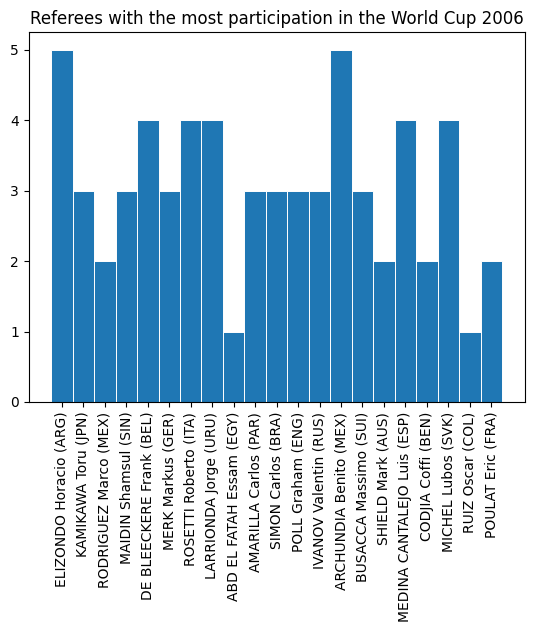

In [20]:
fig, ax = plt.subplots()
data = df_2006.group_by("Referee", maintain_order = True).agg(pl.col("Referee").count().alias("Quantity"))
ax.bar(data["Referee"], data["Quantity"], width = 1, edgecolor = "white", linewidth = 0.7)
ax.set_xticks(data["Referee"])
ax.set_xticklabels(data["Referee"], rotation = 90)
ax.set_title("Referees with the most participation in the World Cup 2006")
plt.show()

In [21]:
fig = px.pie(data, values="Quantity", names="Referee", title='Referees with the most participation in the World Cup 2006')
fig.show()

In [22]:
filter_data = clean_df.group_by("Year", maintain_order = True).agg(
    pl.col("Referee").unique().count().alias("Quantity")
)
fig = px.scatter(x=filter_data["Year"], y = filter_data["Quantity"], title = "Number of main referees per world cup")
fig.show()

## Findings

- The analysis has been oriented to filtering and visualizing relevant information on arbitrators.

- We have identified the number of referees per World Cup, the number of referees per match.

- In relation to the 2006 World Cup we can identify main referees who were given the responsibility of refereeing more matches or important matches.

- We can identify that the number of referees per World Cup has been varying over time and depending on the World Cup.